## Camera Footprint Calulator
In this Jupyter notebook, we can compute and plot the footprint of a camera or other field of view (FOV) related sensor. You will need to edit the Inputs cell below to compute metrics.


In [30]:
# Modules
import math
from mpl_toolkits import mplot3d
import mpl_toolkits.mplot3d.art3d as art3d
%matplotlib notebook
#%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

#INPUTS
cam_name = "ACTI A31"
units= "feet"
horz_fov_deg = 106.9
vert_fov_deg = 79.9
inst_height = 3.281
pitch_deg = 0
roll_deg = 45

In [31]:
# Dimensions of ground-footprint accounting for pitch & roll
top = inst_height*np.tan(np.radians(pitch_deg+1/2*vert_fov_deg))
bottom = inst_height*np.tan(np.radians(pitch_deg-1/2*vert_fov_deg))
left = inst_height*np.tan(np.radians(roll_deg+1/2*horz_fov_deg))
right = inst_height*np.tan(np.radians(roll_deg-1/2*horz_fov_deg))

height = top - bottom
width = left - right
#tan(theta)*instH
origin = (np.tan(np.radians(roll_deg))*inst_height, np.tan(np.radians(pitch_deg))*inst_height,0)
xy_coord = (origin[0] - (width/2), origin[1] - (height/2), 0)
print(xy_coord)

(14.080042588689569, -2.748210291979396, 0)


## Plots

<IPython.core.display.Javascript object>


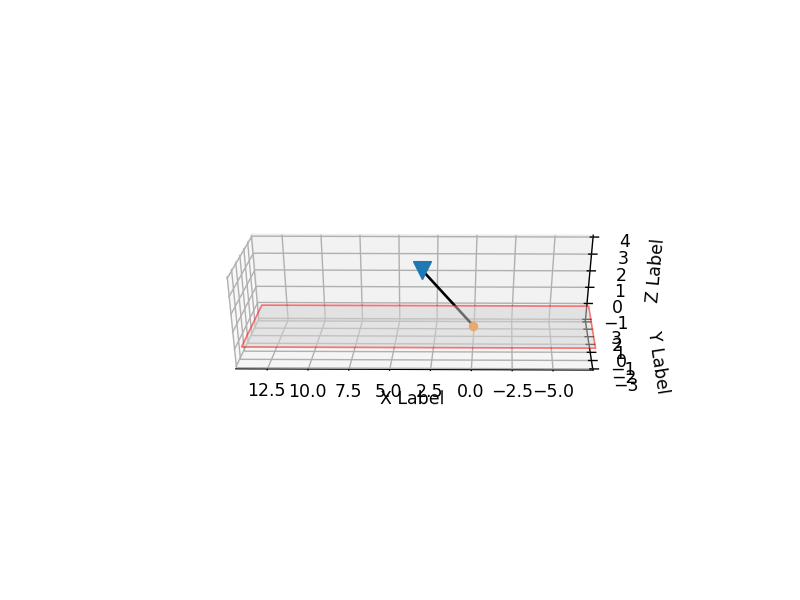

In [34]:
ax = plt.axes(projection='3d')
ax.set_aspect('equal')
rect = patches.Rectangle((xy_coord[0],xy_coord[1]),width,height,linewidth=1,edgecolor='r',facecolor='lightgrey',alpha=0.5)
ax.add_patch(rect)
art3d.pathpatch_2d_to_3d(rect, z=0, zdir="z")


ax.scatter(origin[0], origin[1], inst_height, marker="v", s=100)
ax.scatter(0,0,0)
ax.plot3D((0,origin[0]),(0,origin[1]),(origin[2],inst_height), 'black')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.set_xlim([np.floor(xy_coord[0]), np.ceil(xy_coord[0]+width)])
ax.set_ylim([np.floor(xy_coord[1]), np.ceil(xy_coord[1]+height)])
ax.set_zlim(-1, np.ceil(inst_height))

plt.show()
